# **MODELO GRÁFICO PROBABILÍSTICO PARA LA PREDICCIÓN DE DÍAS DE DESCANSO POR ACCIDENTES LABORALES EN PERÚ**

# 1.- **Selección y limpieza del dataset**

Los datos utilizados en el análisis provienen del registro de accidentes de trabajo no mortales y valoración de los días de descanso, registrados en el Sistema de Accidentes de Trabajo del Ministerio de Trabajo y Promoción del Empleo, publicados en la Plataforma Nacional del Datos Abiertos.

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [ ]:
df = pd.read_csv("https://www.datosabiertos.gob.pe/sites/default/files/Dataset__Registro_Accidentes_De_Trabajo.csv", encoding='latin1', low_memory=False)

In [ ]:
#pd.set_option('display.max_rows', None)
df

,FECHA_CORTE,PERIODO_REGISTRO,FECHA_ACCIDENTE,TIPO_ACCIDENTE,SUB_GRUPO_TIPO_ACCIDENTE,AGENTE_CAUSANTE,SUB_GRUPO_AGENTE_CAUSANTE_1,PARTE_AFECTADA,NATURALEZA_LESION,DEPARTAMENTO,...,ESTADO_CIVIL,CATEGORIA_OCUPACIONAL,TIPO_CONTRATO,GRADO_INSTRUCCION,AREA_TRABAJO,EDAD,TURNO_TRABAJO,GRAVEDAD_ACCIDENTE,DIAS_DESCANSO,MONTO_DESCANSO
0,20230511.0,202304.0,20230419.0,ATRAPADA POR UN OBJETO O ENTRE OBJETOS,ATRAPADA POR UN OBJETO,OTROS APARATOS,OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍG...,DEDOS DE LA MANO,HERIDAS CORTANTES,AREQUIPA,...,SOLTERO/A,OTROS,PLAZO FIJO,EDUCACIÓN TÉCNICA COMPLETA(2),MANTENIMIENTO,35.0,DÍA,ACCIDENTE INCAPACITANTE,11.0,1036.38
1,20230511.0,202304.0,20230410.0,ATRAPADA POR UN OBJETO O ENTRE OBJETOS,ATRAPADA POR UN OBJETO,MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN,"MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE ...",MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS),TRAUMATISMOS INTERNOS,LIMA,...,SOLTERO/A,OPERARIO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,PRODUCCIÓN,18.0,DÍA,ACCIDENTE INCAPACITANTE,5.0,349.30
2,20230511.0,202304.0,20230410.0,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,"MATERIALES, SUSTANCIAS Y RADIACIONES","POLVOS, GASES, LÍQUIDOS Y PRODUCTOS QUÍMICOS, ...","ÓRGANO, APARATO O SISTEMA AFECTADO POR SUSTANC...",INTOXICACIONES,LIMA,...,SOLTERO/A,OPERARIO,INDETERMINADO,EDUCACIÓN SECUNDARIA COMPLETA,PLANTA,32.0,DÍA,ACCIDENTE INCAPACITANTE,1.0,69.86
3,20230511.0,202304.0,20230427.0,PUNZO CORTANTES,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS),HERIDAS CORTANTES,AREQUIPA,...,SOLTERO/A,PEÓN,TIEMPO PARCIAL,EDUCACIÓN SECUNDARIA COMPLETA,ALBAÑILERIA,20.0,DÍA,ACCIDENTE INCAPACITANTE,5.0,349.30
4,20230511.0,202304.0,20230411.0,CAÍDAS DE OBJETOS,OTRAS CAÍDAS DE OBJETOS,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,"HOMBRO (INCLUSIÓN DE CLAVÍCULAS, OMOPLATO Y AX...",CONTUSIONES,CALLAO,...,SOLTERO/A,EMPLEADO,INDETERMINADO,EDUCACIÓN UNIVERSITARIA INCOMPLETA(4),ALMACÉN,36.0,DÍA,ACCIDENTE INCAPACITANTE,2.0,128.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Eliminamos registros que tienen todas las columnas vacías.

total_tuples_before = len(df)
empty_tuples = df.isna().all(axis=1)
total_empty_tuples = len(df[empty_tuples])

df.dropna(how='all',inplace=True)

total_tuples_after = len(df)

dropped_tuples = total_tuples_before - total_tuples_after

print(f"Number of empty tuples: {total_empty_tuples}")
print(f"Number of dropped tuples: {dropped_tuples}")

Number of empty tuples: 34703
Number of dropped tuples: 34703


In [ ]:
#mostramos la cantidad de registros y columnas
df.shape

(30335, 27)

In [ ]:
#mostramos las características de la data
column_types = df.dtypes
print(column_types)

FECHA_CORTE                    float64
PERIODO_REGISTRO               float64
FECHA_ACCIDENTE                float64
TIPO_ACCIDENTE                  object
SUB_GRUPO_TIPO_ACCIDENTE        object
AGENTE_CAUSANTE                 object
SUB_GRUPO_AGENTE_CAUSANTE_1     object
PARTE_AFECTADA                  object
NATURALEZA_LESION               object
DEPARTAMENTO                    object
PROVINCIA                       object
DISTRITO                        object
UBIGEO                         float64
ACTIVIDAD_ECONOMICA             object
SEGURO_SALUD                    object
COBERTURA_PENSION               object
SEXO_TRABAJADOR                 object
ESTADO_CIVIL                    object
CATEGORIA_OCUPACIONAL           object
TIPO_CONTRATO                   object
GRADO_INSTRUCCION               object
AREA_TRABAJO                    object
EDAD                           float64
TURNO_TRABAJO                   object
GRAVEDAD_ACCIDENTE              object
DIAS_DESCANSO            

In [ ]:
#transformamos MONTO_DESCANSO a numérico
df['MONTO_DESCANSO'] = pd.to_numeric(df['MONTO_DESCANSO'], errors='coerce')

#describimos la data
df.describe()

,FECHA_CORTE,PERIODO_REGISTRO,FECHA_ACCIDENTE,UBIGEO,EDAD,DIAS_DESCANSO,MONTO_DESCANSO
count,30335.0,30335.000000,3.033500e+04,30335.000000,30335.000000,30329.000000,30329.000000
mean,20230511.0,202245.447041,2.022333e+07,133476.548838,35.664282,4.404959,323.323953
std,0.0,45.421801,5.336414e+03,61681.377530,11.245660,22.083024,1537.749196
min,20230511.0,202206.000000,2.020010e+07,10601.000000,18.000000,0.000000,0.000000
25%,20230511.0,202209.000000,2.022081e+07,150101.000000,27.000000,2.000000,78.830000
50%,20230511.0,202211.000000,2.022103e+07,150115.000000,34.000000,3.000000,181.400000
75%,20230511.0,202302.000000,2.023012e+07,150132.000000,43.000000,5.000000,319.400000
max,20230511.0,202304.000000,2.023043e+07,999999.000000,70.000000,2828.000000,184421.420000


In [ ]:
#Valores faltantes
missing_values = df.isna().sum()
print(missing_values)

FECHA_CORTE                    0
PERIODO_REGISTRO               0
FECHA_ACCIDENTE                0
TIPO_ACCIDENTE                 0
SUB_GRUPO_TIPO_ACCIDENTE       0
AGENTE_CAUSANTE                0
SUB_GRUPO_AGENTE_CAUSANTE_1    0
PARTE_AFECTADA                 0
NATURALEZA_LESION              0
DEPARTAMENTO                   0
PROVINCIA                      0
DISTRITO                       0
UBIGEO                         0
ACTIVIDAD_ECONOMICA            0
SEGURO_SALUD                   0
COBERTURA_PENSION              0
SEXO_TRABAJADOR                0
ESTADO_CIVIL                   0
CATEGORIA_OCUPACIONAL          0
TIPO_CONTRATO                  0
GRADO_INSTRUCCION              0
AREA_TRABAJO                   0
EDAD                           0
TURNO_TRABAJO                  0
GRAVEDAD_ACCIDENTE             0
DIAS_DESCANSO                  6
MONTO_DESCANSO                 6
dtype: int64


In [ ]:
#Eliminamos las filas con datos faltantes
total_tuples_before = len(df)

df.dropna(inplace=True)
total_tuples_after = len(df)

dropped_tuples = total_tuples_before - total_tuples_after

print(f"Número de filas eliminadas: {dropped_tuples}")

Número de filas eliminadas: 6


In [ ]:
#Eliminamos duplicados
tag_filter_buttonotal_tuples_before = len(df)

df.drop_duplicates(inplace=True)
total_tuples_after = len(df)

dropped_duplicates = total_tuples_before - total_tuples_after

print(f"Número de filas duplicadas eliminadas: {dropped_duplicates}")

Número de filas duplicadas eliminadas: 53


In [ ]:
#convertimos el dato fecha de accidente a tipo fecha
df['FECHA_ACCIDENTE'] = pd.to_datetime(df['FECHA_ACCIDENTE'], format='%Y%m%d')

In [ ]:
#Obtenemos mes y día de la semana de la variable FECHA_ACCIDENTE
#Crear una nueva columna para el mes
df['MES'] = df['FECHA_ACCIDENTE'].dt.month

# Crear una nueva columna para el día de la semana
df['DIA_SEMANA'] = df['FECHA_ACCIDENTE'].dt.day_name()

In [ ]:
#Eliminamos las 2 tuplas con los máximos valores de descanso por accidente
max_value = df['MONTO_DESCANSO'].max()
df.drop(df[df['MONTO_DESCANSO'] == max_value].index, inplace=True)

max_value = df['MONTO_DESCANSO'].max()
df.drop(df[df['MONTO_DESCANSO'] == max_value].index, inplace=True)

In [ ]:
#Eliminamos las columnas FECHA_CORTE y PERIODO_REGISTRO
df.drop(columns=['FECHA_CORTE'], inplace=True)
df.drop(columns=['PERIODO_REGISTRO'], inplace=True)

In [ ]:

replacements = {
    "EDUCACIÓN ESPECIAL COMPLETA": 4,
    "EDUCACIÓN ESPECIAL INCOMPLETA":	3,
    "EDUCACIÓN PRIMARIA COMPLETA":	2,
    "EDUCACIÓN PRIMARIA INCOMPLETA":	1,
    "EDUCACIÓN SECUNDARIA COMPLETA":	4,
    "EDUCACIÓN SECUNDARIA INCOMPLETA":	3,
    "EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) COMPLETA(3)":	6,
    "EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) INCOMPLETA(3)":	5,
    "EDUCACIÓN TÉCNICA COMPLETA(2)":	6,
    "EDUCACIÓN TÉCNICA INCOMPLETA(2)":	5,
    "EDUCACIÓN UNIVERSITARIA COMPLETA(4)":	8,
    "EDUCACIÓN UNIVERSITARIA INCOMPLETA(4)":	7,
    "ESTUDIOS DE DOCTORADO INCOMPLETO":	8,
    "ESTUDIOS DE MAESTRÍA COMPLETA":	8,
    "ESTUDIOS DE MAESTRÍA INCOMPLETA":	8,
    "GRADO DE BACHILLER":	8,
    "GRADO DE DOCTOR":	8,
    "GRADO DE MAESTRÍA":	8,
    "SIN EDUCACIÓN FORMAL":	0,
    "TITULADO":	8,
}

# Create a new column with replaced values
df["GRADO_INSTRUCCION_ORD"] = df["GRADO_INSTRUCCION"].replace(replacements)


In [ ]:
#SEGURO DE SALUD
df['SEGURO_SALUD'] = df['SEGURO_SALUD'].replace('SEGURO PRIVADO DE SALUD', 'EPS')


In [ ]:
seguros_salud_unicos = df['SEGURO_SALUD'].drop_duplicates()

# Mostrar los valores únicos
print(seguros_salud_unicos)

0    ESSALUD
1        EPS
3        SIS
Name: SEGURO_SALUD, dtype: object


In [ ]:
df.columns

Index(['FECHA_ACCIDENTE', 'TIPO_ACCIDENTE', 'SUB_GRUPO_TIPO_ACCIDENTE',
       'AGENTE_CAUSANTE', 'SUB_GRUPO_AGENTE_CAUSANTE_1', 'PARTE_AFECTADA',
       'NATURALEZA_LESION', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'ACTIVIDAD_ECONOMICA', 'SEGURO_SALUD', 'COBERTURA_PENSION',
       'SEXO_TRABAJADOR', 'ESTADO_CIVIL', 'CATEGORIA_OCUPACIONAL',
       'TIPO_CONTRATO', 'GRADO_INSTRUCCION', 'AREA_TRABAJO', 'EDAD',
       'TURNO_TRABAJO', 'GRAVEDAD_ACCIDENTE', 'DIAS_DESCANSO',
       'MONTO_DESCANSO', 'MES', 'DIA_SEMANA', 'GRADO_INSTRUCCION_ORD'],
      dtype='object')

# 2.- **Análisis Exploratorio de Datos**

In [ ]:
numeric_columns = ['EDAD', 'DIAS_DESCANSO', 'MONTO_DESCANSO']
for col in numeric_columns:
    fig = px.histogram(df, x=col, nbins=10, title=f'Histograma de {col}')
    fig.update_layout(xaxis_title=col, yaxis_title='Frecuencia', bargap=0.1)
    fig.show()

In [ ]:
columns_to_plot = ['TIPO_ACCIDENTE', 'SUB_GRUPO_TIPO_ACCIDENTE',
       'AGENTE_CAUSANTE', 'SUB_GRUPO_AGENTE_CAUSANTE_1', 'PARTE_AFECTADA',
       'NATURALEZA_LESION', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'ACTIVIDAD_ECONOMICA', 'SEGURO_SALUD', 'COBERTURA_PENSION',
       'SEXO_TRABAJADOR', 'ESTADO_CIVIL', 'CATEGORIA_OCUPACIONAL',
       'TIPO_CONTRATO', 'GRADO_INSTRUCCION', 'AREA_TRABAJO', 'EDAD',
       'TURNO_TRABAJO', 'GRAVEDAD_ACCIDENTE', 'MES', 'DIA_SEMANA']
color = 'skyblue'

In [ ]:
for col in columns_to_plot:
    counts = df[col].value_counts()
    fig = px.bar(x=counts.index, y=counts.values, color_discrete_sequence=[color])
    fig.update_layout(title=f'Gráfico de Barras de {col}', xaxis_title=col, yaxis_title='Frecuencia')
    fig.show()

In [ ]:
columnas_seleccionadas = ['DEPARTAMENTO',
'ACTIVIDAD_ECONOMICA',
'TIPO_ACCIDENTE',
'PARTE_AFECTADA',
'TURNO_TRABAJO',
'GRADO_INSTRUCCION',
'TIPO_CONTRATO',
'EDAD',
'NATURALEZA_LESION',
'CATEGORIA_OCUPACIONAL',
'SEGURO_SALUD',
'SEXO_TRABAJADOR',
'DIAS_DESCANSO' ]

In [ ]:
valores_distintos = df[columnas_seleccionadas].nunique()

print(valores_distintos)

DEPARTAMENTO             26
ACTIVIDAD_ECONOMICA      17
TIPO_ACCIDENTE           10
PARTE_AFECTADA           44
TURNO_TRABAJO             3
GRADO_INSTRUCCION        20
TIPO_CONTRATO             4
EDAD                     53
NATURALEZA_LESION        22
CATEGORIA_OCUPACIONAL    10
SEGURO_SALUD              3
SEXO_TRABAJADOR           2
DIAS_DESCANSO            85
dtype: int64


**Seleccionamos departamentos Arequipa y Lima**

In [ ]:
dfpgm = df[df['DEPARTAMENTO'].isin(['LIMA', 'AREQUIPA'])]
valores_distintos = dfpgm[columnas_seleccionadas].nunique()
print(valores_distintos)


DEPARTAMENTO              2
ACTIVIDAD_ECONOMICA      17
TIPO_ACCIDENTE           10
PARTE_AFECTADA           44
TURNO_TRABAJO             3
GRADO_INSTRUCCION        20
TIPO_CONTRATO             4
EDAD                     53
NATURALEZA_LESION        22
CATEGORIA_OCUPACIONAL    10
SEGURO_SALUD              3
SEXO_TRABAJADOR           2
DIAS_DESCANSO            62
dtype: int64


**Propuesta de agrupación de ACTIVIDAD_ECONOMICA**

1) Servicios:
Servicios Sociales y de Salud
Enseñanza
Hoteles y Restaurantes
Administración Pública, Planes de Seguridad Social
Intermediación Financiera
Otras Actividades de Servicios Comerciales, Sociales y Personales
Actividades Inmobiliarias, Empresariales y de Alquiler
Comercio al por Mayor y al por Menor; Reparación de Vehículos Automotores
Transportes, Almacenamiento y Comunicaciones

2)Industria y Minas
Explotación de Minas y Canteras
Industrias Manufactureras
Suministro de Electricidad, Gas y Agua
Construcción

3) Agricultura y Pesca:
Agricultura, Ganadería, Caza y Silvicultura
Pesca

4)No Determinado/No Identificado:
No Determinado
ND - No Identificado - Código de MINTRA

In [ ]:
unique_actividades = dfpgm['ACTIVIDAD_ECONOMICA'].unique()

print(unique_actividades)


['TRANSPORTES, ALMACENAM. Y COMUN.' 'INDUSTRIAS MANUFACTURERAS'
 'SUMIN.,ELECTRICIDAD, GAS Y AGUA' 'CONSTRUCCIÓN'
 'ADM.PÚBLICA, PLANES DE SEG.,SOC.' 'ACT. INMOBILIARIAS, EMP. Y ALQ.'
 'COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES'
 'HOTELES Y RESTAURANTES' 'ND - NO IDENTIFICADO - CODIGO DE MINTRA'
 'NO DETERMINADO' 'OTRAS ACT.,SERV.COM.,SOC.Y PER.'
 'INTERMEDIACIÓN FINANCIERA' 'AGRICULT.,GANAD.,CAZA Y SILVIC.'
 'SERVICIOS SOCIALES Y DE SALUD' 'PESCA' 'EXPLOTACIÓN DE MINAS Y CANTERAS'
 'ENSEÑANZA']


In [ ]:
#eliminamos los no determinados Y efectuamos reemplazos
dfpgm = dfpgm[~dfpgm['ACTIVIDAD_ECONOMICA'].isin(['ND - NO IDENTIFICADO - CODIGO DE MINTRA', 'NO DETERMINADO'])]

dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('TRANSPORTES, ALMACENAM. Y COMUN.', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('INDUSTRIAS MANUFACTURERAS', 'INDUSTRIA Y MINAS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('SUMIN.,ELECTRICIDAD, GAS Y AGUA', 'INDUSTRIA Y MINAS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('CONSTRUCCIÓN', 'INDUSTRIA Y MINAS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('ADM.PÚBLICA, PLANES DE SEG.,SOC.', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('ACT. INMOBILIARIAS, EMP. Y ALQ.', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('COMERCIO AL POR MAYOR Y AL POR MENOR', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('REPARACION DE VEHÍCULOS AUTOMOTORES', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('HOTELES Y RESTAURANTES', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('INTERMEDIACIÓN FINANCIERA', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('AGRICULT.,GANAD.,CAZA Y SILVIC.', 'AGRICULTURA Y PESCA')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('PESCA', 'AGRICULTURA Y PESCA')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('OTRAS ACT.,SERV.COM.,SOC.Y PER.', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('SERVICIOS SOCIALES Y DE SALUD', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('ENSEÑANZA', 'SERVICIOS')
dfpgm['ACTIVIDAD_ECONOMICA'] = dfpgm['ACTIVIDAD_ECONOMICA'].replace('EXPLOTACIÓN DE MINAS Y CANTERAS', 'INDUSTRIA Y MINAS')
unique_actividades = dfpgm['ACTIVIDAD_ECONOMICA'].unique()
print(unique_actividades)

<ipython-input-26-174ac912636b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-174ac912636b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-174ac912636b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-174ac91

['SERVICIOS' 'INDUSTRIA Y MINAS' 'AGRICULTURA Y PESCA']


**Propuesta de agrupación de EDAD**

Adulto joven: 18-34 años

Adulto: 35-54 años

Adulto mayor: 55-64 años

Anciano: 65 años en adelante


In [ ]:
print(dfpgm['EDAD'].dtype)

float64


In [ ]:
def categorize_age(age):
    if 18 <= age <= 34:
        return 'Adulto joven'
    elif 35 <= age <= 54:
        return 'Adulto'
    elif 55 <= age <= 64:
        return 'Adulto mayor'
    elif age >= 65:
        return 'Anciano'
    else:
        return 'Menor de edad'

# Apply the function to the 'EDAD' column and create a new column 'AGE_GROUP'
dfpgm['EDAD'] = dfpgm['EDAD'].apply(categorize_age)
unique_actividades = dfpgm['EDAD'].unique()
print(unique_actividades)

['Adulto' 'Adulto joven' 'Adulto mayor' 'Anciano']


**Propuesta de agrupación de NATURALEZA_LESION**

1) Lesiones externas:

Escoriaciones
Contusiones
Heridas punzantes
Heridas cortantes
Heridas contusas (por golpes o de bordes irregular)
Quemaduras leves

2)Lesiones internas:

Fracturas
Torceduras y esguinces
Luxaciones
Amputaciones
Herida de bala
Traumátismos internos

3)Lesiones sistémicas:

Efectos de las radiaciones
Efectos de electricidad
Asfixia
Intoxicaciones
Intoxicaciones por plaguicidas
Gangrenas

4)Otras lesiones:

Cuerpo extraño en ojos
Disfunciones orgánicas
Herida de tejidos
Otros

In [ ]:
unique_actividades = dfpgm['NATURALEZA_LESION'].unique()

print(unique_actividades)

['HERIDAS CORTANTES' 'TRAUMATISMOS INTERNOS' 'INTOXICACIONES'
 'CONTUSIONES' 'TORCEDURAS Y ESGUINCES' 'OTROS' 'QUEMADURAS'
 'CUERPO EXTRAÑO EN OJOS' 'LUXACIONES' 'FRACTURAS'
 'HERIDAS CONTUSAS (POR GOLPES O DE BORDES IRREGULAR)' 'HERIDAS PUNZANTES'
 'HERIDA DE TEJIDOS' 'AMPUTACIONES' 'DISFUNCIONES ORGÁNICAS'
 'EFECTOS DE LAS RADIACIONES' 'HERIDA DE BALA' 'EFECTOS DE ELECTRICIDAD'
 'INTOXICACIONES POR PLAGUICIDAS' 'ESCORIACIONES' 'ASFIXIA' 'GANGRENAS']


In [ ]:
#eliminamos los otros y efectuamos reemplazos
dfpgm = dfpgm[~dfpgm['NATURALEZA_LESION'].isin(['OTROS'])]

dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('HERIDAS CORTANTES', 'LESIONES EXTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('TRAUMATISMOS INTERNOS', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('INTOXICACIONES', 'LESIONES SISTEMICAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('CONTUSIONES', 'LESIONES EXTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('TORCEDURAS Y ESGUINCES', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('ESCORIACIONES', 'LESIONES EXTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('QUEMADURAS', 'LESIONES EXTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('CUERPO EXTRAÑO EN OJOS', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('LUXACIONES', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('FRACTURAS', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('HERIDAS CONTUSAS (POR GOLPES O DE BORDES IRREGULAR)', 'LESIONES EXTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('HERIDAS PUNZANTES', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('HERIDA DE TEJIDOS', 'LESIONES EXTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('AMPUTACIONES', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('DISFUNCIONES ORGÁNICAS', 'LESIONES SISTEMICAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('EFECTOS DE LAS RADIACIONES', 'LESIONES SISTEMICAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('HERIDA DE BALA', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('EFECTOS DE ELECTRICIDAD', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('INTOXICACIONES POR PLAGUICIDAS', 'LESIONES SISTEMICAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('GANGRENAS', 'LESIONES INTERNAS')
dfpgm['NATURALEZA_LESION'] = dfpgm['NATURALEZA_LESION'].replace('ASFIXIA', 'LESIONES SISTEMICAS')
unique_actividades = dfpgm['NATURALEZA_LESION'].unique()

print(unique_actividades)

<ipython-input-30-1c1bba06cb3a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-1c1bba06cb3a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-1c1bba06cb3a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-1c1bba0

['LESIONES EXTERNAS' 'LESIONES INTERNAS' 'LESIONES SISTEMICAS']


**Propuesta de agrupación de TIPO_ACCIDENTE**

1) CAIDAS:

Caídas de personas

2)CONTACTO CON OBJETOS:

ATRAPADA POR UN OBJETO O ENTRE OBJETOS;
PUNZO CORTANTES;
CAÍDAS DE OBJETOS;
PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJETOS, A EXCEPCIÓN DE CAÍDAS DE OBJETOS;

3)AGENTES FÍSICOS Y QUÍMICOS:

'EXPOSICIÓN A, O CONTACTO CON, SUSTANCIAS NOCIVAS O RADIACIONES';
 'EXPOSICIÓN A, O CONTACTO CON, TEMPERATURAS EXTREMAS';
 'CONTACTO CON LA CORRIENTE ELÉCTRICA'

4)ERGONÓMICOS
ESFUERZOS EXCSIVOS O FALSOS MOVIMIENTOS

In [ ]:
unique_actividades = dfpgm['TIPO_ACCIDENTE'].unique()

print(unique_actividades)


['ATRAPADA POR UN OBJETO O ENTRE OBJETOS'
 'OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR FALTA DE DATOS SUFICIENTES'
 'PUNZO CORTANTES' 'CAÍDAS DE PERSONAS' 'CAÍDAS DE OBJETOS'
 'ESFUERZOS EXCESIVOS O FALSOS MOVIMIENTOS'
 'PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJETOS, A EXCEPCIÓN DE CAÍDAS DE OBJETOS'
 'EXPOSICIÓN A, O CONTACTO CON, SUSTANCIAS NOCIVAS O RADIACIONES'
 'EXPOSICIÓN A, O CONTACTO CON, TEMPERATURAS EXTREMAS'
 'CONTACTO CON LA CORRIENTE ELÉCTRICA']


In [ ]:
#eliminamos los 'OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR FALTA DE DATOS SUFICIENTES' y efectuamos reemplazos
dfpgm = dfpgm[~dfpgm['TIPO_ACCIDENTE'].isin(['OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR FALTA DE DATOS SUFICIENTES'])]

dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('ATRAPADA POR UN OBJETO O ENTRE OBJETOS', 'CONTACTO CON OBJETOS')
dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('PUNZO CORTANTES', 'CONTACTO CON OBJETOS')
dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('CAÍDAS DE PERSONAS', 'CAIDAS')
dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('CAÍDAS DE OBJETOS', 'CONTACTO CON OBJETOS')
dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJETOS, A EXCEPCIÓN DE CAÍDAS DE OBJETOS', 'CONTACTO CON OBJETOS')
dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('EXPOSICIÓN A, O CONTACTO CON, SUSTANCIAS NOCIVAS O RADIACIONES', 'AGENTES FÍSICOS Y QUÍMICOS')
dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('EXPOSICIÓN A, O CONTACTO CON, TEMPERATURAS EXTREMAS', 'AGENTES FÍSICOS Y QUÍMICOS')
dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('CONTACTO CON LA CORRIENTE ELÉCTRICA', 'AGENTES FÍSICOS Y QUÍMICOS')
dfpgm['TIPO_ACCIDENTE'] = dfpgm['TIPO_ACCIDENTE'].replace('ESFUERZOS EXCESIVOS O FALSOS MOVIMIENTOS', 'ERGONÓMICOS')

unique_actividades = dfpgm['TIPO_ACCIDENTE'].unique()

print(unique_actividades)


['CONTACTO CON OBJETOS' 'CAIDAS' 'ERGONÓMICOS'
 'AGENTES FÍSICOS Y QUÍMICOS']


<ipython-input-32-6320e9b6155a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-6320e9b6155a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-6320e9b6155a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-6320e9b

Propuesta de agrupación de PARTE_AFECTADA

replacements = {
    'DEDOS DE LA MANO': 'Miembro superior',
    'MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS)': 'Miembro superior',
    'MUSLO': 'Miembro inferior',
    'REGIÓN LUMBOSACRA (COLUMNA VERTEBRAL Y MUSCULAR ADYACENTES)': 'Tronco',
    'NARIZ Y SENOS PARANASALES': 'Cabeza',
    'HOMBRO (INCLUSIÓN DE CLAVÍCULAS, OMOPLATO Y AXILA)': 'Miembro superior',
    'TOBILLO': 'Miembro inferior',
    'TRONCO': 'Tronco',
    'TRONCO, UBICACIONES MÚLTIPLES' : 'Tronco'
    'RODILLA': 'Miembro inferior',
    'PIE (CON EXCEPCIÓN DE LOS DEDOS)': 'Miembro inferior',
    'OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA Y EL NERVIO ÓPTICO)': 'Cabeza',
    'UBICACIONES MÚLTIPLES, COMPROMISO DE DOS O MAS ZONAS AFECTADAS ESPECIFICADAS EN LA TABLA (ESPECIFICAR)': 'Múltiple o sistémico',
    'PIERNA': 'Miembro inferior',
    'MUÑECA': 'Miembro superior',
    'TÓRAX (COSTILLAS, ESTERNÓN)': 'Tronco',
    'CABEZA, UBICACIONES MÚLTIPLES': 'Cabeza',
    'CADERA': 'Tronco',
    'ANTEBRAZO': 'Miembro superior',
    'PIE (SOLO AFECCIONES DÉRMICAS)': 'Miembro inferior',
    'PELVIS': 'Tronco',
    'ABDOMEN (PARED ABDOMINAL)': 'Tronco',
    'REGIÓN DORSAL': 'Tronco',
    'CUELLO': 'Cabeza',
    'BRAZO': 'Miembro superior',
    'CARA (UBICACIÓN NO CLASIFICADA EN OTRAS DENOMINACIONES)': 'Cabeza',
    'REGIÓN CRANEANA (CRÁNEO, CUERO CABELLUDO)': 'Cabeza',
    'MIEMBRO SUPERIOR, UBICACIONES MÚLTIPLES': 'Miembro superior',
    'SISTEMA NERVIOSO EN GENERAL': 'Múltiple o sistémico'
    'DEDOS DE LOS PIES': Miembro inferior',
    'BOCA (CON INCLUSIÓN DE LABIOS, DIENTES Y LENGUA)': 'Cabeza',
    'REGIÓN CERVICAL': 'Cabeza',
    'MIEMBRO INFERIOR, UBICACIONES MÚLTIPLES': 'Miembro inferior',
    'APARATO RESPIRATORIO EN GENERAL': 'Múltiple o sistémico',
    'APARATO GENITAL EN GENERAL': 'Miembro inferior',
    'APARATO DIGESTIVO EN GENERAL': 'Múltiple o sistémico',
    'ÓRGANO, APARATO O SISTEMA AFECTADO POR SUSTANCIAS QUÍMICAS': 'Múltiple o sistémico',
    'APARATO URINARIO EN GENERAL': 'Múltiple o sistémico',
    'APARATO AUDITIVO': 'Cabeza',
    'MAMAS': 'Tronco',
    'SISTEMA ENDOCRINO EN GENERAL': 'Múltiple o sistémico',
    'APARATO PSI´QUICO EN GENERAL': ´Múltiple o sistémico',
}


In [ ]:
unique_actividades = dfpgm['PARTE_AFECTADA'].unique()

print(unique_actividades)

['DEDOS DE LA MANO' 'MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS)' 'CODO'
 'MUSLO' 'REGIÓN LUMBOSACRA (COLUMNA VERTEBRAL Y MUSCULAR ADYACENTES)'
 'NARIZ Y SENOS PARANASALES'
 'HOMBRO (INCLUSIÓN DE CLAVÍCULAS, OMOPLATO Y AXILA)' 'TOBILLO'
 'TRONCO, UBICACIONES MÚLTIPLES' 'RODILLA'
 'PIE (CON EXCEPCIÓN DE LOS DEDOS)'
 'OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA Y EL NERVIO ÓPTICO)'
 'UBICACIONES MÚLTIPLES, COMPROMISO DE DOS O MAS ZONAS AFECTADAS ESPECIFICADAS EN LA TABLA (ESPECIFICAR)'
 'PIERNA' 'OTROS (ESPECIFICAR)' 'MUÑECA' 'TÓRAX (COSTILLAS, ESTERNÓN)'
 'CABEZA, UBICACIONES MÚLTIPLES' 'CADERA' 'ANTEBRAZO'
 'PIE (SOLO AFECCIONES DÉRMICAS)' 'PELVIS' 'ABDOMEN (PARED ABDOMINAL)'
 'REGIÓN DORSAL' 'CUELLO' 'BRAZO'
 'CARA (UBICACIÓN NO CLASIFICADA EN OTRAS DENOMINACIONES)'
 'REGIÓN CRANEANA (CRÁNEO, CUERO CABELLUDO)'
 'MIEMBRO SUPERIOR, UBICACIONES MÚLTIPLES' 'SISTEMA NERVIOSO EN GENERAL'
 'DEDOS DE LOS PIES' 'BOCA (CON INCLUSIÓN DE LABIOS, DIENTES Y LENGUA)'
 'REGIÓN CERVICAL' 'MIEMBRO INFER

In [ ]:
#eliminamos los 'OTROS (ESPECIFICAR)'
dfpgm = dfpgm[~dfpgm['PARTE_AFECTADA'].isin(['OTROS (ESPECIFICAR)'])]

replacements = {
    'DEDOS DE LA MANO': 'Miembro superior',
    'CODO': 'Miembro superior',
    'MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS)': 'Miembro superior',
    'MUSLO': 'Miembro inferior',
    'REGIÓN LUMBOSACRA (COLUMNA VERTEBRAL Y MUSCULAR ADYACENTES)': 'Tronco',
    'NARIZ Y SENOS PARANASALES': 'Cabeza',
    'HOMBRO (INCLUSIÓN DE CLAVÍCULAS, OMOPLATO Y AXILA)': 'Miembro superior',
    'TOBILLO': 'Miembro inferior',
    'TRONCO': 'Tronco',
    'TRONCO, UBICACIONES MÚLTIPLES' : 'Tronco',
    'RODILLA': 'Miembro inferior',
    'PIE (CON EXCEPCIÓN DE LOS DEDOS)': 'Miembro inferior',
    'OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA Y EL NERVIO ÓPTICO)': 'Cabeza',
    'UBICACIONES MÚLTIPLES, COMPROMISO DE DOS O MAS ZONAS AFECTADAS ESPECIFICADAS EN LA TABLA (ESPECIFICAR)': 'Múltiple o sistémico',
    'PIERNA': 'Miembro inferior',
    'MUÑECA': 'Miembro superior',
    'TÓRAX (COSTILLAS, ESTERNÓN)': 'Tronco',
    'CABEZA, UBICACIONES MÚLTIPLES': 'Cabeza',
    'CADERA': 'Tronco',
    'ANTEBRAZO': 'Miembro superior',
    'PIE (SOLO AFECCIONES DÉRMICAS)': 'Miembro inferior',
    'PELVIS': 'Tronco',
    'ABDOMEN (PARED ABDOMINAL)': 'Tronco',
    'REGIÓN DORSAL': 'Tronco',
    'CUELLO': 'Cabeza',
    'BRAZO': 'Miembro superior',
    'CARA (UBICACIÓN NO CLASIFICADA EN OTRAS DENOMINACIONES)': 'Cabeza',
    'REGIÓN CRANEANA (CRÁNEO, CUERO CABELLUDO)': 'Cabeza',
    'MIEMBRO SUPERIOR, UBICACIONES MÚLTIPLES': 'Miembro superior',
    'SISTEMA NERVIOSO EN GENERAL': 'Múltiple o sistémico',
    'DEDOS DE LOS PIES': 'Miembro inferior',
    'BOCA (CON INCLUSIÓN DE LABIOS, DIENTES Y LENGUA)': 'Cabeza',
    'REGIÓN CERVICAL': 'Cabeza',
    'MIEMBRO INFERIOR, UBICACIONES MÚLTIPLES': 'Miembro inferior',
    'APARATO RESPIRATORIO EN GENERAL': 'Múltiple o sistémico',
    'APARATO GENITAL EN GENERAL': 'Miembro inferior',
    'APARATO DIGESTIVO EN GENERAL': 'Múltiple o sistémico',
    'ÓRGANO, APARATO O SISTEMA AFECTADO POR SUSTANCIAS QUÍMICAS': 'Múltiple o sistémico',
    'APARATO URINARIO EN GENERAL': 'Múltiple o sistémico',
    'APARATO AUDITIVO': 'Cabeza',
    'MAMAS': 'Tronco',
    'SISTEMA ENDOCRINO EN GENERAL': 'Múltiple o sistémico',
    'APARATO PSI´QUICO EN GENERAL': 'Múltiple o sistémico',
}

dfpgm['PARTE_AFECTADA'] = dfpgm['PARTE_AFECTADA'].replace(replacements)

unique_actividades = dfpgm['PARTE_AFECTADA'].unique()

print(unique_actividades)

['Miembro superior' 'Miembro inferior' 'Tronco' 'Cabeza'
 'Múltiple o sistémico']


**Propuesta de agrupación de GRADO_INSTRUCCION**



In [ ]:
unique_actividades = dfpgm['GRADO_INSTRUCCION'].unique()

print(unique_actividades)

['EDUCACIÓN TÉCNICA COMPLETA(2)' 'EDUCACIÓN SECUNDARIA COMPLETA'
 'EDUCACIÓN SECUNDARIA INCOMPLETA' 'EDUCACIÓN TÉCNICA INCOMPLETA(2)'
 'EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) INCOMPLETA(3)'
 'EDUCACIÓN UNIVERSITARIA INCOMPLETA(4)' 'EDUCACIÓN PRIMARIA COMPLETA'
 'ESTUDIOS DE MAESTRÍA COMPLETA'
 'EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) COMPLETA(3)'
 'EDUCACIÓN UNIVERSITARIA COMPLETA(4)' 'GRADO DE BACHILLER' 'TITULADO'
 'SIN EDUCACIÓN FORMAL' 'EDUCACIÓN ESPECIAL COMPLETA'
 'EDUCACIÓN PRIMARIA INCOMPLETA' 'ESTUDIOS DE MAESTRÍA INCOMPLETA'
 'EDUCACIÓN ESPECIAL INCOMPLETA' 'GRADO DE DOCTOR' 'GRADO DE MAESTRÍA']


In [ ]:
replacements = {
    'EDUCACIÓN TÉCNICA COMPLETA(2)': 'INTERMEDIA',
    'EDUCACIÓN SECUNDARIA COMPLETA': 'SECUNDARIA',
    'EDUCACIÓN TÉCNICA INCOMPLETA(2)': 'SECUNDARIA',
    'EDUCACIÓN SECUNDARIA INCOMPLETA': 'BASICA',
    'EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) INCOMPLETA(3)': 'SECUNDARIA',
    'EDUCACIÓN UNIVERSITARIA INCOMPLETA(4)': 'INTERMEDIA',
    'EDUCACIÓN PRIMARIA COMPLETA': 'BASICA',
    'ESTUDIOS DE MAESTRÍA COMPLETA': 'SUPERIOR',
    'EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) COMPLETA(3)': 'INTERMEDIA',
    'EDUCACIÓN UNIVERSITARIA COMPLETA(4)': 'SUPERIOR',
    'GRADO DE BACHILLER': 'SUPERIOR',
    'TITULADO': 'SUPERIOR',
    'SIN EDUCACIÓN FORMAL': 'BASICA',
    'EDUCACIÓN ESPECIAL COMPLETA': 'SECUNDARIA',
    'EDUCACIÓN PRIMARIA INCOMPLETA':'BASICA',
    'ESTUDIOS DE MAESTRÍA INCOMPLETA': 'SUPERIOR',
    'EDUCACIÓN ESPECIAL INCOMPLETA': 'BASICA',
    'GRADO DE DOCTOR': 'SUPERIOR',
    'GRADO DE MAESTRÍA': 'SUPERIOR',
}

dfpgm['GRADO_INSTRUCCION'] = dfpgm['GRADO_INSTRUCCION'].replace(replacements)

unique_actividades = dfpgm['GRADO_INSTRUCCION'].unique()

print(unique_actividades)

['INTERMEDIA' 'SECUNDARIA' 'BASICA' 'SUPERIOR']


**Propuesta de agrupación de CATEGORIA_OCUPACIONAL**

In [ ]:
unique_actividades = dfpgm['CATEGORIA_OCUPACIONAL'].unique()

print(unique_actividades)

['OTROS' 'OPERARIO' 'PEÓN' 'EMPLEADO' 'TRABAJADOR INDEPENDIENTE' 'TÉCNICO'
 'CAPATAZ' 'OFICIAL' 'JEFE DE PLANTA' 'FUNCIONARIO']


In [ ]:
#eliminamos los 'OTROS'
dfpgm = dfpgm[~dfpgm['CATEGORIA_OCUPACIONAL'].isin(['OTROS'])]

replacements = {
    'OPERARIO': 'OBRERO',
    'PEÓN': 'OBRERO',
    'EMPLEADO': 'EMPLEADO',
    'TRABAJADOR INDEPENDIENTE': 'INDEPENDIENTE',
    'TÉCNICO': 'OBRERO',
    'CAPATAZ': 'OBRERO',
    'OFICIAL': 'OBRERO',
    'JEFE DE PLANTA': 'EMPLEADO',
    'FUNCIONARIO': 'EMPLEADO',
}

dfpgm['CATEGORIA_OCUPACIONAL'] = dfpgm['CATEGORIA_OCUPACIONAL'].replace(replacements)

unique_actividades = dfpgm['CATEGORIA_OCUPACIONAL'].unique()

print(unique_actividades)

['OBRERO' 'EMPLEADO' 'INDEPENDIENTE']


**Propuesta de agrupacion DIAS_DESCANSO**

In [ ]:
bins = [0, 1, 20, 2000]
labels = ['LEVE', 'MODERADO', 'GRAVE']

# Group 'DIAS_DESCANSO' into bins
dfpgm['DIAS_DESCANSO'] = pd.cut(dfpgm['DIAS_DESCANSO'], bins=bins, labels=labels, right=False)

# Print the unique values of 'DIAS_DESCANSO_GROUP'
unique_values = dfpgm['DIAS_DESCANSO'].unique()
print(unique_values)

['MODERADO', 'LEVE', 'GRAVE']
Categories (3, object): ['LEVE' < 'MODERADO' < 'GRAVE']


In [ ]:
valores_distintos = dfpgm[columnas_seleccionadas].nunique()

print(valores_distintos)

dfpgm

DEPARTAMENTO             2
ACTIVIDAD_ECONOMICA      3
TIPO_ACCIDENTE           4
PARTE_AFECTADA           5
TURNO_TRABAJO            3
GRADO_INSTRUCCION        4
TIPO_CONTRATO            4
EDAD                     4
NATURALEZA_LESION        3
CATEGORIA_OCUPACIONAL    3
SEGURO_SALUD             3
SEXO_TRABAJADOR          2
DIAS_DESCANSO            3
dtype: int64


,FECHA_ACCIDENTE,TIPO_ACCIDENTE,SUB_GRUPO_TIPO_ACCIDENTE,AGENTE_CAUSANTE,SUB_GRUPO_AGENTE_CAUSANTE_1,PARTE_AFECTADA,NATURALEZA_LESION,DEPARTAMENTO,PROVINCIA,DISTRITO,...,GRADO_INSTRUCCION,AREA_TRABAJO,EDAD,TURNO_TRABAJO,GRAVEDAD_ACCIDENTE,DIAS_DESCANSO,MONTO_DESCANSO,MES,DIA_SEMANA,GRADO_INSTRUCCION_ORD
1,2023-04-10,CONTACTO CON OBJETOS,ATRAPADA POR UN OBJETO,MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN,"MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE ...",Miembro superior,LESIONES INTERNAS,LIMA,LIMA,LIMA,...,SECUNDARIA,PRODUCCIÓN,Adulto joven,DÍA,ACCIDENTE INCAPACITANTE,MODERADO,349.30,4,Monday,4
3,2023-04-27,CONTACTO CON OBJETOS,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,Miembro superior,LESIONES EXTERNAS,AREQUIPA,AREQUIPA,YANAHUARA,...,SECUNDARIA,ALBAÑILERIA,Adulto joven,DÍA,ACCIDENTE INCAPACITANTE,MODERADO,349.30,4,Thursday,4
5,2023-04-19,CAIDAS,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,Miembro superior,LESIONES EXTERNAS,AREQUIPA,AREQUIPA,SACHACA,...,BASICA,OBRERA,Adulto,DÍA,ACCIDENTE INCAPACITANTE,MODERADO,209.58,4,Wednesday,3
6,2023-04-11,CONTACTO CON OBJETOS,"DERRUMBE (CAÍDAS DE MASAS DE TIERRA, DE ROCAS,...",AMBIENTE DEL TRABAJO,INTERIOR,Miembro inferior,LESIONES EXTERNAS,LIMA,LIMA,MAGDALENA VIEJA,...,SECUNDARIA,INSTALACIONES ELÉCTRICAS,Adulto joven,DÍA,ACCIDENTE INCAPACITANTE,MODERADO,139.72,4,Tuesday,5
12,2023-03-31,CAIDAS,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,AMBIENTE DEL TRABAJO,INTERIOR,Tronco,LESIONES EXTERNAS,LIMA,LIMA,BREÑA,...,SECUNDARIA,FABRICACIÓN,Adulto,DÍA,ACCIDENTE INCAPACITANTE,MODERADO,209.58,3,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30322,2022-06-01,CONTACTO CON OBJETOS,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,"MATERIALES, SUSTANCIAS Y RADIACIONES",OTROS MATERIALES Y SUSTANCIAS NO CLASIFICADOS ...,Miembro superior,LESIONES EXTERNAS,LIMA,LIMA,SANTIAGO DE SURCO,...,SECUNDARIA,ALMACEN,Adulto,DÍA,ACCIDENTE INCAPACITANTE,MODERADO,276.10,6,Wednesday,4
30323,2022-06-01,CAIDAS,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,AMBIENTE DEL TRABAJO,INTERIOR,Miembro superior,LESIONES EXTERNAS,LIMA,LIMA,SANTIAGO DE SURCO,...,SECUNDARIA,OFICINA,Adulto mayor,DÍA,ACCIDENTE INCAPACITANTE,MODERADO,574.67,6,Wednesday,4
30328,2022-05-31,CONTACTO CON OBJETOS,GOLPES POR OBJETOS MÓVILES (COMPRENDIDOS LOS F...,OTROS APARATOS,HERRAMIENTAS ELÉCTRICAS MANUALES,Cabeza,LESIONES INTERNAS,LIMA,LIMA,SANTIAGO DE SURCO,...,SECUNDARIA,OPERARIO DE CAMPO,Adulto joven,TARDE,ACCIDENTE INCAPACITANTE,MODERADO,239.17,5,Tuesday,4
30330,2022-05-31,CONTACTO CON OBJETOS,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,OTROS APARATOS,OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍG...,Miembro superior,LESIONES EXTERNAS,LIMA,LIMA,LURIN,...,SECUNDARIA,TRANSPORTE,Adulto,NOCHE,ACCIDENTE INCAPACITANTE,MODERADO,185.07,5,Tuesday,4


# 3.- **Representación del MGM**

In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
from pgmpy.models.BayesianNetwork import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [ ]:
model = BayesianNetwork([('DEPARTAMENTO','ACTIVIDAD_ECONOMICA'),
('ACTIVIDAD_ECONOMICA','TIPO_ACCIDENTE'),
('TIPO_ACCIDENTE','PARTE_AFECTADA'),
('TIPO_ACCIDENTE','NATURALEZA_LESION'),
('TURNO_TRABAJO','CATEGORIA_OCUPACIONAL'),
('GRADO_INSTRUCCION','TIPO_CONTRATO'),
('GRADO_INSTRUCCION','SEGURO_SALUD'),
('PARTE_AFECTADA','DIAS_DESCANSO'),
('NATURALEZA_LESION','DIAS_DESCANSO'),
('CATEGORIA_OCUPACIONAL','DIAS_DESCANSO'),
('TIPO_CONTRATO','DIAS_DESCANSO'),
('SEGURO_SALUD','DIAS_DESCANSO'),
('EDAD','DIAS_DESCANSO'),
('SEXO_TRABAJADOR','DIAS_DESCANSO')])

#4.- **Aprendizaje de parámetros**

#### **4.1 Distribución de probabilidad condicional(cpd)**

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

mle = MaximumLikelihoodEstimator(model, dfpgm)

In [ ]:
#Función para convertir TabularCPD a df
def covierte_a_df(cpd):
  # Obtener los valores, las variables de evidencia y la variable objetivo del CPD
  valores = cpd.values
  evidencia = cpd.variables[:-1]
  objetivo = cpd.variables[-1]

  # Obtener los nombres de los estados para cada variable
  nombres_estados = {var: cpd.state_names[var] for var in cpd.variables}

  # Obtener todas las combinaciones de valores de las variables de evidencia
  combinaciones_evidencia = itertools.product(*[range(card) for card in cpd.cardinality[:-1]])

  # Crear una lista de todas las filas del DataFrame
  filas = []

  # Iterar sobre cada combinación de valores de las variables de evidencia
  for valores_evidencia in combinaciones_evidencia:
      # Iterar sobre cada valor de la variable objetivo
      for valor_objetivo in range(cpd.cardinality[-1]):
          # Crear una fila con los nombres de los estados de las variables de evidencia, el nombre del estado objetivo y la probabilidad correspondiente
          fila = [nombres_estados[var][val] for var, val in zip(evidencia, valores_evidencia)] + \
                [nombres_estados[objetivo][valor_objetivo], valores[(*valores_evidencia, valor_objetivo)]]
          # Agregar la fila a la lista de filas
          filas.append(fila)

  # Crear el DataFrame a partir de la lista de filas
  columnas = evidencia + [objetivo, 'Probabilidad']
  cpd_df = pd.DataFrame(filas, columns=columnas)

  return cpd_df


In [ ]:
cpd_departamento = mle.estimate_cpd('DEPARTAMENTO') # INCONDICIONAL
print(cpd_departamento)

+------------------------+-----------+
| DEPARTAMENTO(AREQUIPA) | 0.0959574 |
+------------------------+-----------+
| DEPARTAMENTO(LIMA)     | 0.904043  |
+------------------------+-----------+


In [ ]:
cpd_actividad_economica = mle.estimate_cpd('ACTIVIDAD_ECONOMICA') # CONDICIONAL
print(cpd_actividad_economica)

+------------------------------------------+------------------------+---------------------+
| DEPARTAMENTO                             | DEPARTAMENTO(AREQUIPA) | DEPARTAMENTO(LIMA)  |
+------------------------------------------+------------------------+---------------------+
| ACTIVIDAD_ECONOMICA(AGRICULTURA Y PESCA) | 0.040036396724294813   | 0.01583928916360827 |
+------------------------------------------+------------------------+---------------------+
| ACTIVIDAD_ECONOMICA(INDUSTRIA Y MINAS)   | 0.4840764331210191     | 0.3527139269847402  |
+------------------------------------------+------------------------+---------------------+
| ACTIVIDAD_ECONOMICA(SERVICIOS)           | 0.47588717015468607    | 0.6314467838516515  |
+------------------------------------------+------------------------+---------------------+


In [ ]:
cpd_tipo_accidente = mle.estimate_cpd('TIPO_ACCIDENTE') # CONDICIONAL

cpd_tipo_accidente_df = covierte_a_df(cpd_tipo_accidente)

cpd_tipo_accidente_df

,TIPO_ACCIDENTE,ACTIVIDAD_ECONOMICA,Probabilidad
0,AGENTES FÍSICOS Y QUÍMICOS,AGRICULTURA Y PESCA,0.052885
1,AGENTES FÍSICOS Y QUÍMICOS,INDUSTRIA Y MINAS,0.056644
2,AGENTES FÍSICOS Y QUÍMICOS,SERVICIOS,0.061181
3,CAIDAS,AGRICULTURA Y PESCA,0.302885
4,CAIDAS,INDUSTRIA Y MINAS,0.177820
5,CAIDAS,SERVICIOS,0.307464
6,CONTACTO CON OBJETOS,AGRICULTURA Y PESCA,0.538462
7,CONTACTO CON OBJETOS,INDUSTRIA Y MINAS,0.594646
8,CONTACTO CON OBJETOS,SERVICIOS,0.488316
9,ERGONÓMICOS,AGRICULTURA Y PESCA,0.105769


In [ ]:
cpd_parte_afectada = mle.estimate_cpd('PARTE_AFECTADA') # CONDICIONAL

cpd_parte_afectada_df = covierte_a_df(cpd_parte_afectada)

cpd_parte_afectada_df

,PARTE_AFECTADA,TIPO_ACCIDENTE,Probabilidad
0,Cabeza,AGENTES FÍSICOS Y QUÍMICOS,0.361765
1,Cabeza,CAIDAS,0.082606
2,Cabeza,CONTACTO CON OBJETOS,0.139550
3,Cabeza,ERGONÓMICOS,0.061820
4,Miembro inferior,AGENTES FÍSICOS Y QUÍMICOS,0.076471
5,Miembro inferior,CAIDAS,0.401948
6,Miembro inferior,CONTACTO CON OBJETOS,0.239749
7,Miembro inferior,ERGONÓMICOS,0.255295
8,Miembro superior,AGENTES FÍSICOS Y QUÍMICOS,0.360294
9,Miembro superior,CAIDAS,0.226998


In [ ]:
cpd_naturaleza_lesion = mle.estimate_cpd('NATURALEZA_LESION') # CONDICIONAL

cpd_naturaleza_lesion_df = covierte_a_df(cpd_parte_afectada)

cpd_naturaleza_lesion_df

,PARTE_AFECTADA,TIPO_ACCIDENTE,Probabilidad
0,Cabeza,AGENTES FÍSICOS Y QUÍMICOS,0.361765
1,Cabeza,CAIDAS,0.082606
2,Cabeza,CONTACTO CON OBJETOS,0.139550
3,Cabeza,ERGONÓMICOS,0.061820
4,Miembro inferior,AGENTES FÍSICOS Y QUÍMICOS,0.076471
5,Miembro inferior,CAIDAS,0.401948
6,Miembro inferior,CONTACTO CON OBJETOS,0.239749
7,Miembro inferior,ERGONÓMICOS,0.255295
8,Miembro superior,AGENTES FÍSICOS Y QUÍMICOS,0.360294
9,Miembro superior,CAIDAS,0.226998


In [ ]:
cpd_turno_trabajo = mle.estimate_cpd('TURNO_TRABAJO') # INCONDICIONAL

print(cpd_turno_trabajo)

+----------------------+-----------+
| TURNO_TRABAJO(DÍA)   | 0.817253  |
+----------------------+-----------+
| TURNO_TRABAJO(NOCHE) | 0.0758753 |
+----------------------+-----------+
| TURNO_TRABAJO(TARDE) | 0.106872  |
+----------------------+-----------+


In [ ]:
cpd_categoria_ocupacional = mle.estimate_cpd('CATEGORIA_OCUPACIONAL') # CONDICIONAL

cpd_categoria_ocupacional_df = covierte_a_df(cpd_categoria_ocupacional)

cpd_categoria_ocupacional_df

,CATEGORIA_OCUPACIONAL,TURNO_TRABAJO,Probabilidad
0,EMPLEADO,DÍA,0.531944
1,EMPLEADO,NOCHE,0.550058
2,EMPLEADO,TARDE,0.562908
3,INDEPENDIENTE,DÍA,0.002030
4,INDEPENDIENTE,NOCHE,0.001151
5,INDEPENDIENTE,TARDE,0.002451
6,OBRERO,DÍA,0.466026
7,OBRERO,NOCHE,0.448792
8,OBRERO,TARDE,0.434641


In [ ]:
cpd_grado_instruccion = mle.estimate_cpd('GRADO_INSTRUCCION') # INCONDICIONAL

print(cpd_grado_instruccion)

+-------------------------------+-----------+
| GRADO_INSTRUCCION(BASICA)     | 0.0422597 |
+-------------------------------+-----------+
| GRADO_INSTRUCCION(INTERMEDIA) | 0.225443  |
+-------------------------------+-----------+
| GRADO_INSTRUCCION(SECUNDARIA) | 0.684449  |
+-------------------------------+-----------+
| GRADO_INSTRUCCION(SUPERIOR)   | 0.0478477 |
+-------------------------------+-----------+


In [ ]:
cpd_tipo_contrato = mle.estimate_cpd('TIPO_CONTRATO') # CONDICIONAL

cpd_tipo_contrato_df = covierte_a_df(cpd_tipo_contrato)

cpd_tipo_contrato_df

,TIPO_CONTRATO,GRADO_INSTRUCCION,Probabilidad
0,INDETERMINADO,BASICA,0.307851
1,INDETERMINADO,INTERMEDIA,0.309837
2,INDETERMINADO,SECUNDARIA,0.323893
3,INDETERMINADO,SUPERIOR,0.394161
4,MODALIDADES FORMATIVAS,BASICA,0.068182
5,MODALIDADES FORMATIVAS,INTERMEDIA,0.027111
6,MODALIDADES FORMATIVAS,SECUNDARIA,0.011226
7,MODALIDADES FORMATIVAS,SUPERIOR,0.049270
8,PLAZO FIJO,BASICA,0.336777
9,PLAZO FIJO,INTERMEDIA,0.484895


In [ ]:
cpd_edad = mle.estimate_cpd('EDAD') # INCONDICIONAL

print(cpd_edad)

+--------------------+-----------+
| EDAD(Adulto)       | 0.404348  |
+--------------------+-----------+
| EDAD(Adulto joven) | 0.531738  |
+--------------------+-----------+
| EDAD(Adulto mayor) | 0.0531738 |
+--------------------+-----------+
| EDAD(Anciano)      | 0.0107395 |
+--------------------+-----------+


In [ ]:
cpd_seguro_salud = mle.estimate_cpd('SEGURO_SALUD') # CONDICIONAL

cpd_seguro_salud_df = covierte_a_df(cpd_seguro_salud)

cpd_seguro_salud_df

,SEGURO_SALUD,GRADO_INSTRUCCION,Probabilidad
0,EPS,BASICA,0.330579
1,EPS,INTERMEDIA,0.242835
2,EPS,SECUNDARIA,0.287919
3,EPS,SUPERIOR,0.308394
4,ESSALUD,BASICA,0.623967
5,ESSALUD,INTERMEDIA,0.738187
6,ESSALUD,SECUNDARIA,0.685674
7,ESSALUD,SUPERIOR,0.660584
8,SIS,BASICA,0.045455
9,SIS,INTERMEDIA,0.018978


In [ ]:
cpd_sexo_trabajador = mle.estimate_cpd('SEXO_TRABAJADOR') # INCONDICIONAL

print(cpd_sexo_trabajador)

+----------------------------+----------+
| SEXO_TRABAJADOR(FEMENINO)  | 0.237842 |
+----------------------------+----------+
| SEXO_TRABAJADOR(MASCULINO) | 0.762158 |
+----------------------------+----------+


In [ ]:
cpd_dias_descanso= mle.estimate_cpd('DIAS_DESCANSO') # CONDICIONAL

cpd_dias_descanso_df = covierte_a_df(cpd_dias_descanso)

cpd_dias_descanso_df

,DIAS_DESCANSO,CATEGORIA_OCUPACIONAL,EDAD,NATURALEZA_LESION,PARTE_AFECTADA,SEGURO_SALUD,SEXO_TRABAJADOR,TIPO_CONTRATO,Probabilidad
0,GRAVE,EMPLEADO,Adulto,LESIONES EXTERNAS,Cabeza,EPS,FEMENINO,INDETERMINADO,0.000000
1,GRAVE,EMPLEADO,Adulto,LESIONES EXTERNAS,Cabeza,EPS,FEMENINO,MODALIDADES FORMATIVAS,0.333333
2,GRAVE,EMPLEADO,Adulto,LESIONES EXTERNAS,Cabeza,EPS,FEMENINO,PLAZO FIJO,0.000000
3,GRAVE,EMPLEADO,Adulto,LESIONES EXTERNAS,Cabeza,EPS,FEMENINO,TIEMPO PARCIAL,0.000000
4,GRAVE,EMPLEADO,Adulto,LESIONES EXTERNAS,Cabeza,EPS,MASCULINO,INDETERMINADO,0.000000
...,...,...,...,...,...,...,...,...,...
12955,MODERADO,OBRERO,Anciano,LESIONES SISTEMICAS,Tronco,SIS,FEMENINO,TIEMPO PARCIAL,0.333333
12956,MODERADO,OBRERO,Anciano,LESIONES SISTEMICAS,Tronco,SIS,MASCULINO,INDETERMINADO,0.333333
12957,MODERADO,OBRERO,Anciano,LESIONES SISTEMICAS,Tronco,SIS,MASCULINO,MODALIDADES FORMATIVAS,0.333333
12958,MODERADO,OBRERO,Anciano,LESIONES SISTEMICAS,Tronco,SIS,MASCULINO,PLAZO FIJO,0.333333


In [ ]:
model.add_cpds(cpd_departamento,cpd_actividad_economica,cpd_tipo_accidente,cpd_parte_afectada,cpd_naturaleza_lesion,cpd_turno_trabajo,cpd_categoria_ocupacional,cpd_grado_instruccion,cpd_seguro_salud,cpd_tipo_contrato,cpd_edad,cpd_sexo_trabajador,cpd_dias_descanso)

In [ ]:
model.check_model()

True

#### **4.2 Visualizar el grafo (DAG) correspondiente al MGP**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#Crear un grafo dirigido vacío
grafo = nx.DiGraph()

# Agregar aristas al grafo dirigido
grafo.add_edge('DEPARTAMENTO','ACTIVIDAD_ECONOMICA')
grafo.add_edge('ACTIVIDAD_ECONOMICA','TIPO_ACCIDENTE')
grafo.add_edge('TIPO_ACCIDENTE','PARTE_AFECTADA')
grafo.add_edge('TIPO_ACCIDENTE','NATURALEZA_LESION')
grafo.add_edge('TURNO_TRABAJO','CATEGORIA_OCUPACIONAL')
grafo.add_edge('GRADO_INSTRUCCION','TIPO_CONTRATO')
grafo.add_edge('GRADO_INSTRUCCION','SEGURO_SALUD')
grafo.add_edge('PARTE_AFECTADA','DIAS_DESCANSO')
grafo.add_edge('NATURALEZA_LESION','DIAS_DESCANSO')
grafo.add_edge('CATEGORIA_OCUPACIONAL','DIAS_DESCANSO')
grafo.add_edge('TIPO_CONTRATO','DIAS_DESCANSO')
grafo.add_edge('SEGURO_SALUD','DIAS_DESCANSO')
grafo.add_edge('EDAD','DIAS_DESCANSO')
grafo.add_edge('SEXO_TRABAJADOR','DIAS_DESCANSO')

In [ ]:
pos_personalizada = {
    'DEPARTAMENTO': (10, 15),
    'ACTIVIDAD_ECONOMICA': (10, 10),
    'TIPO_ACCIDENTE': (10, 6),
    'PARTE_AFECTADA': (3, 3),
    'NATURALEZA_LESION': (15,3),
    'CATEGORIA_OCUPACIONAL': (32, 5),
    'TURNO_TRABAJO': (43, 10),
    'GRADO_INSTRUCCION': (28, 15),
    'TIPO_CONTRATO': (23, 10),
    'SEGURO_SALUD': (33, 10),
    'EDAD': (43, 2),
    'SEXO_TRABAJADOR': (33, 2),
    'DIAS_DESCANSO': (23, -2)
}

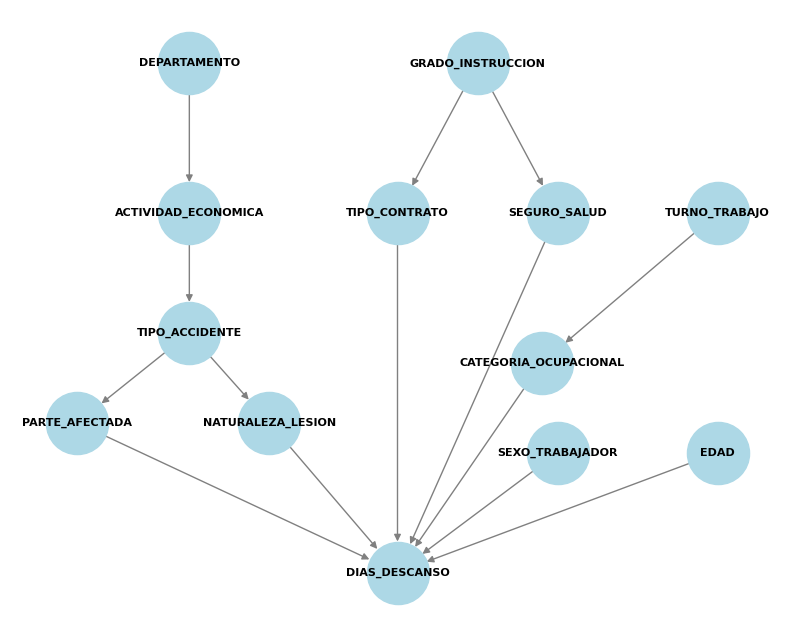

In [ ]:
# Mostrar el grafo
plt.figure(figsize=(10, 8))
nx.draw_networkx(grafo, pos=pos_personalizada, with_labels=True, node_color='lightblue',
                 node_size=2000, font_size=8, font_weight='bold', edge_color='gray')

# Mostrar el grafo
plt.axis('off')
plt.show()

#5.- **Aprendizaje estructurado**

In [ ]:
#Librerias generales
import os
import random
import warnings
import numpy as np
import pandas as pd
from scipy.io import arff

#Librerias PGMPY
import pgmpy.estimators as ests
from pgmpy.estimators import TreeSearch
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.metrics import structure_score

#Librerias para aprendizaje automatico en Python
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#Librerias para visualizaciones
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
random_state = 123
np.random.seed(random_state)
warnings.simplefilter('ignore')
np.set_printoptions(precision=2, suppress=True)

## **5.1 Definición de datos de entrada**

In [ ]:
#transformación de dfpgm a numérico
dfpgm[columnas_seleccionadas].dtypes

DEPARTAMENTO               object
ACTIVIDAD_ECONOMICA        object
TIPO_ACCIDENTE             object
PARTE_AFECTADA             object
TURNO_TRABAJO              object
GRADO_INSTRUCCION          object
TIPO_CONTRATO              object
EDAD                       object
NATURALEZA_LESION          object
CATEGORIA_OCUPACIONAL      object
SEGURO_SALUD               object
SEXO_TRABAJADOR            object
DIAS_DESCANSO            category
dtype: object

In [ ]:
#transformación de dfpgm a numérico

# Select the specified columns to create dfpgm_ord
dfpgm_ord = dfpgm[columnas_seleccionadas].copy()

# Initialize an empty dictionary to store the mappings
mappings = {}

# Transform the values in these columns to numerical data type using pd.Categorical.codes
for column in dfpgm_ord.columns:
    # Create categorical data type
    cat = pd.Categorical(dfpgm_ord[column])
    # Store the mapping in the dictionary
    mappings[column] = dict(enumerate(cat.categories))
    # Transform the column to numerical codes
    dfpgm_ord[column] = cat.codes

# Display the mappings
for column, mapping in mappings.items():
    print(f"Mapping for column '{column}': {mapping}")

# Display the first few rows of the new DataFrame
print(dfpgm_ord.head())

Mapping for column 'DEPARTAMENTO': {0: 'AREQUIPA', 1: 'LIMA'}
Mapping for column 'ACTIVIDAD_ECONOMICA': {0: 'AGRICULTURA Y PESCA', 1: 'INDUSTRIA Y MINAS', 2: 'SERVICIOS'}
Mapping for column 'TIPO_ACCIDENTE': {0: 'AGENTES FÍSICOS Y QUÍMICOS', 1: 'CAIDAS', 2: 'CONTACTO CON OBJETOS', 3: 'ERGONÓMICOS'}
Mapping for column 'PARTE_AFECTADA': {0: 'Cabeza', 1: 'Miembro inferior', 2: 'Miembro superior', 3: 'Múltiple o sistémico', 4: 'Tronco'}
Mapping for column 'TURNO_TRABAJO': {0: 'DÍA', 1: 'NOCHE', 2: 'TARDE'}
Mapping for column 'GRADO_INSTRUCCION': {0: 'BASICA', 1: 'INTERMEDIA', 2: 'SECUNDARIA', 3: 'SUPERIOR'}
Mapping for column 'TIPO_CONTRATO': {0: 'INDETERMINADO', 1: 'MODALIDADES FORMATIVAS', 2: 'PLAZO FIJO', 3: 'TIEMPO PARCIAL'}
Mapping for column 'EDAD': {0: 'Adulto', 1: 'Adulto joven', 2: 'Adulto mayor', 3: 'Anciano'}
Mapping for column 'NATURALEZA_LESION': {0: 'LESIONES EXTERNAS', 1: 'LESIONES INTERNAS', 2: 'LESIONES SISTEMICAS'}
Mapping for column 'CATEGORIA_OCUPACIONAL': {0: 'EMPLEADO

In [ ]:
dfpgm_ord.dtypes

DEPARTAMENTO             int8
ACTIVIDAD_ECONOMICA      int8
TIPO_ACCIDENTE           int8
PARTE_AFECTADA           int8
TURNO_TRABAJO            int8
GRADO_INSTRUCCION        int8
TIPO_CONTRATO            int8
EDAD                     int8
NATURALEZA_LESION        int8
CATEGORIA_OCUPACIONAL    int8
SEGURO_SALUD             int8
SEXO_TRABAJADOR          int8
DIAS_DESCANSO            int8
dtype: object

In [ ]:
X = (dfpgm_ord.iloc[:, :-1])
y = (dfpgm_ord.iloc[:, -1])
X.head()

,DEPARTAMENTO,ACTIVIDAD_ECONOMICA,TIPO_ACCIDENTE,PARTE_AFECTADA,TURNO_TRABAJO,GRADO_INSTRUCCION,TIPO_CONTRATO,EDAD,NATURALEZA_LESION,CATEGORIA_OCUPACIONAL,SEGURO_SALUD,SEXO_TRABAJADOR
1,1,1,2,2,0,2,2,1,1,2,0,1
3,0,1,2,2,0,2,3,1,0,2,2,1
5,0,2,1,2,0,0,2,0,0,2,1,0
6,1,2,2,1,0,2,0,1,0,2,1,1
12,1,1,1,4,0,2,2,0,0,2,0,1


In [ ]:
y.head()

1     1
3     1
5     1
6     1
12    1
Name: DIAS_DESCANSO, dtype: int8

## **5.2 Ingeniería de características**

In [ ]:
#ordenamos las características de mayor a menor puntaje obtenido (mayor correlacionadas)
fs = SelectKBest(score_func=chi2, k=12)
f_best = fs.fit_transform(X, y)

top_features = sorted(zip(list(X.columns), fs.scores_), key=lambda x: x[1], reverse=True)

print("Lista ordenada de mayor a menor:")
for feature, value in top_features:
    print("'{}' : {}".format(feature, value))

Lista ordenada de mayor a menor:
'SEGURO_SALUD' : 109.68843800691117
'NATURALEZA_LESION' : 96.3230068726464
'TIPO_CONTRATO' : 44.54275700188899
'CATEGORIA_OCUPACIONAL' : 38.418415084985654
'SEXO_TRABAJADOR' : 12.7896591987865
'ACTIVIDAD_ECONOMICA' : 5.65632092059514
'TIPO_ACCIDENTE' : 5.1185794273828416
'DEPARTAMENTO' : 3.7620367148420093
'TURNO_TRABAJO' : 3.4120208099078453
'GRADO_INSTRUCCION' : 3.0555383252260966
'EDAD' : 1.0247321236715137
'PARTE_AFECTADA' : 0.7913127137775584


## **5.3 Gráfico acíclico dirigido probabilístico - pDAG**

In [ ]:
#Especificamos el nodo que debera ser el raiz utilizando el algoritmo de arboles pq el dataset tienen mas de 4 nodos o variables
#est = TreeSearch(dfpgm_ord, root_node='SEGURO_SALUD')
est = TreeSearch(dfpgm_ord)
#En la variable dag contendremos la red bayesiana obtenida por Aprendizaje Estructurado utilizando el estimador de tipo chow-liu
dag1 = est.estimate(estimator_type='chow-liu')



Building tree:   0%|          | 0/78.0 [00:00<?, ?it/s]

In [ ]:
pos_personalizada2 = {
    'DEPARTAMENTO': (10, 15),
    'ACTIVIDAD_ECONOMICA': (10, 10),
    'TIPO_ACCIDENTE': (10, 6),
    'PARTE_AFECTADA': (3, 3),
    'NATURALEZA_LESION': (15,3),
    'CATEGORIA_OCUPACIONAL': (35, 5),
    'TURNO_TRABAJO': (43, 10),
    'GRADO_INSTRUCCION': (37, 15),
    'TIPO_CONTRATO': (23, 12),
    'SEGURO_SALUD': (32, 13),
    'EDAD': (43, 2),
    'SEXO_TRABAJADOR': (33, 2),
    'DIAS_DESCANSO': (23, -2)
}

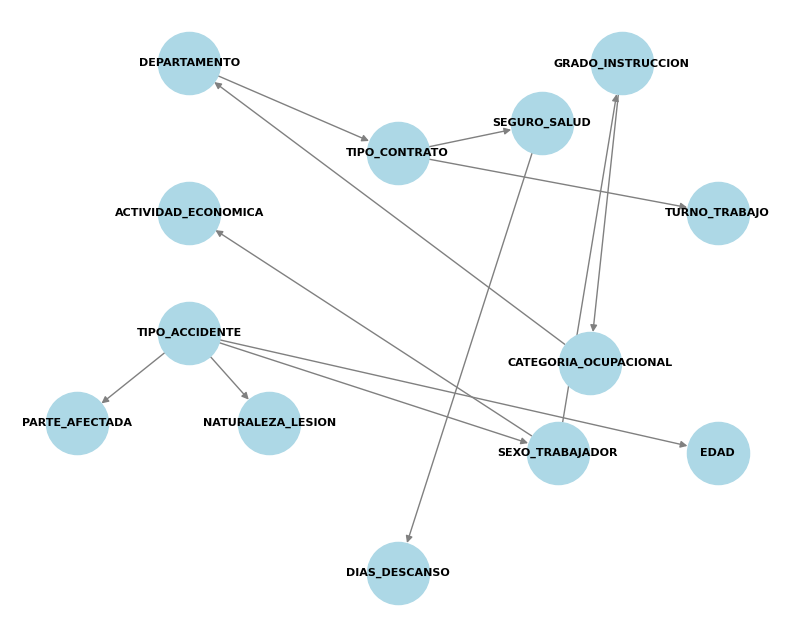

In [ ]:
# Mostrar el grafo
plt.figure(figsize=(10, 8))

nx.draw_networkx(dag1, pos=pos_personalizada2, with_labels=True, node_color='lightblue',
                 node_size=2000, font_size=8, font_weight='bold', edge_color='gray')

# Mostrar el grafo
plt.axis('off')
plt.show()

In [ ]:
#Aristas de dag1

print("Aristas: ", dag1.edges())

print("Origen y destino de las Aristas")
print("-------------------------------" "\n")
nx.to_pandas_edgelist(dag1)

Aristas:  [('TIPO_ACCIDENTE', 'PARTE_AFECTADA'), ('TIPO_ACCIDENTE', 'NATURALEZA_LESION'), ('TIPO_ACCIDENTE', 'SEXO_TRABAJADOR'), ('TIPO_ACCIDENTE', 'EDAD'), ('SEXO_TRABAJADOR', 'ACTIVIDAD_ECONOMICA'), ('SEXO_TRABAJADOR', 'GRADO_INSTRUCCION'), ('GRADO_INSTRUCCION', 'CATEGORIA_OCUPACIONAL'), ('CATEGORIA_OCUPACIONAL', 'DEPARTAMENTO'), ('DEPARTAMENTO', 'TIPO_CONTRATO'), ('TIPO_CONTRATO', 'SEGURO_SALUD'), ('TIPO_CONTRATO', 'TURNO_TRABAJO'), ('SEGURO_SALUD', 'DIAS_DESCANSO')]
Origen y destino de las Aristas
-------------------------------



,source,target,weight
0,TIPO_ACCIDENTE,PARTE_AFECTADA,None
1,TIPO_ACCIDENTE,NATURALEZA_LESION,None
2,TIPO_ACCIDENTE,SEXO_TRABAJADOR,None
3,TIPO_ACCIDENTE,EDAD,None
4,SEXO_TRABAJADOR,ACTIVIDAD_ECONOMICA,None
5,SEXO_TRABAJADOR,GRADO_INSTRUCCION,None
6,GRADO_INSTRUCCION,CATEGORIA_OCUPACIONAL,None
7,CATEGORIA_OCUPACIONAL,DEPARTAMENTO,None
8,DEPARTAMENTO,TIPO_CONTRATO,None
9,TIPO_CONTRATO,SEGURO_SALUD,None


In [ ]:
#from pgmpy.estimators import ExhaustiveSearch
#est = ExhaustiveSearch(dfpgm_ord)
#dag = est.estimate()
#Mostramos el DAG con un layout de tipo spiral
#pos = nx.spiral_layout(dag)
#nx.draw(dag, pos=pos, with_labels=True,node_color='r', font_size=8, arrowstyle='fancy', alpha=0.8)
#Guardamos el grafo DAG en un archivo .png que podemos visualizar y/o descargar
#plt.savefig('plt.png')

## **5.4 Red Bayesiana**

In [ ]:
#A partir del DAG (Grafo Dirigido Aciclico) creamos la red bayesiana
model1 = BayesianNetwork(dag1)
#A partir del modelo creado generamos los CPDs automaticamente a partir del metod fit.
#El metodo fit lo aplicamos al modelo teniendo como parametro el conjunto de datos
model1.fit(dfpgm_ord)

#model1.fit(dfpgm_ord, estimator=BayesianEstimator)
model1.get_cpds()

[<TabularCPD representing P(TIPO_ACCIDENTE:4) at 0x78cccbb4b8e0>,
 <TabularCPD representing P(PARTE_AFECTADA:5 | TIPO_ACCIDENTE:4) at 0x78cc1276ae90>,
 <TabularCPD representing P(NATURALEZA_LESION:3 | TIPO_ACCIDENTE:4) at 0x78cc1276be80>,
 <TabularCPD representing P(SEXO_TRABAJADOR:2 | TIPO_ACCIDENTE:4) at 0x78cc11d14be0>,
 <TabularCPD representing P(EDAD:4 | TIPO_ACCIDENTE:4) at 0x78cc11d14fd0>,
 <TabularCPD representing P(ACTIVIDAD_ECONOMICA:3 | SEXO_TRABAJADOR:2) at 0x78cc11d14490>,
 <TabularCPD representing P(GRADO_INSTRUCCION:4 | SEXO_TRABAJADOR:2) at 0x78cc11d15180>,
 <TabularCPD representing P(CATEGORIA_OCUPACIONAL:3 | GRADO_INSTRUCCION:4) at 0x78cc11d158d0>,
 <TabularCPD representing P(DEPARTAMENTO:2 | CATEGORIA_OCUPACIONAL:3) at 0x78cc11d15660>,
 <TabularCPD representing P(TIPO_CONTRATO:4 | DEPARTAMENTO:2) at 0x78cc11d14c40>,
 <TabularCPD representing P(SEGURO_SALUD:3 | TIPO_CONTRATO:4) at 0x78cc11d15c00>,
 <TabularCPD representing P(TURNO_TRABAJO:3 | TIPO_CONTRATO:4) at 0x78c

## **5.5 Predicciones**

**Predicción para el modelo original basado en juicio y experiencia de experto**

In [ ]:
#A partir del modelo creado generamos los CPDs automaticamente a partir del metod fit.
#El metodo fit lo aplicamos al modelo teniendo como parametro el conjunto de datos

from pgmpy.estimators import TreeSearch, BayesianEstimator
from pgmpy.models import BayesianNetwork

model.fit(dfpgm_ord, estimator=BayesianEstimator)
model.get_cpds()
test = np.squeeze(dfpgm_ord.iloc[:, -1].values)

#las valores de la columna a predecir se encuentra en la ultima columna
#del dataset, la variable DIAS_DESCANSO
predict_data = dfpgm_ord.iloc[:, :-1]

#la variable y_pred contiene el resultado de ejecutar el metodo predict
#al modelo, pasando como argumento el dataset de prueba que no contiene la variable a predecir
# DIAS_DESCANSO
y_pred = model.predict(predict_data)

#Obtenemos el puntaje de precision del modelo comparando los valores obtenidos
#de la prediccion en y_pred.values vs los valores de la variable DIAS_DESCANSO de la
result = accuracy_score(np.squeeze(y_pred.values), test)

print("Obtenemos una precision de : ", round(result*100,2),'%')

  0%|          | 0/5959 [00:00<?, ?it/s]

Obtenemos una precision de :  88.2 %


**Predicción para el modelo con aprendizaje estructurado**

In [ ]:
#np.squeeze recibe los valores de un dataset en formato arreglo
#y devuelve un array conteniendo los valores de la(s) columna(s) especificadas
test = np.squeeze(dfpgm_ord.iloc[:, -1].values)

#las valores de la columna a predecir se encuentra en la ultima columna del dataset,
#es la variable DIAS_DESCANSO
predict_data = dfpgm_ord.iloc[:, :-1]

#la variable y_pred contiene el resultado de ejecutar el metodo predict al modelo,
#pasando como argumento el dataset de prueba que no contiene la variable a predecir
y_pred = model1.predict(predict_data)

#Obtenemos el puntaje de precision del modelo comparando los valores obtenidos
#de la prediccion en y_pred.values vs los valores de la variable DIAS_DESCANSO de la
result = accuracy_score(np.squeeze(y_pred.values), test)
print("Obtenemos una precision de : ", round(result*100,2),'%')

  0%|          | 0/5959 [00:00<?, ?it/s]

Obtenemos una precision de :  87.36 %


## **5.6 Inferencias**

¿Cuál es la probabilidad de que un accidentado tenga "DÍAS DE DESCANSO" médico MODERADO (2 a 20 días) considerando que el "TIPO DE ACCIDENTE" es CAÍDA con "PARTE AFECTADA" CABEZA y "NATURALEZA DE LESIÓN" FRACTURA?

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'DIAS_DESCANSO': 1}, evidence={'TIPO_ACCIDENTE': 1, 'PARTE_AFECTADA': 0, 'NATURALEZA_LESION': 1})
print(query)

print("La probabilidad es de ", round(query.values[1]*100,2),'%')

+------------------+----------------------+
| DIAS_DESCANSO    |   phi(DIAS_DESCANSO) |
+==================+======================+
| DIAS_DESCANSO(0) |               0.1351 |
+------------------+----------------------+
| DIAS_DESCANSO(1) |               0.8370 |
+------------------+----------------------+
| DIAS_DESCANSO(2) |               0.0279 |
+------------------+----------------------+
La probabilidad es de  83.7 %


¿Cuál es la probabilidad de que un accidentado sufra un "TIPO DE ACCIDENTE" por ATRAPAMIENTO, considerando que la "ACTIVIDAD ECONÓMICA" es INDUSTRIA Y MINAS en el "DEPARTAMENTO" de AREQUIPA?​

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'TIPO_ACCIDENTE': 3}, evidence={'ACTIVIDAD_ECONOMICA': 1, 'DEPARTAMENTO': 0})
print(query)

print("La probabilidad es de ", round(query.values[3]*100,2),'%')

+-------------------+-----------------------+
| TIPO_ACCIDENTE    |   phi(TIPO_ACCIDENTE) |
+===================+=======================+
| TIPO_ACCIDENTE(0) |                0.0567 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(1) |                0.1778 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(2) |                0.5945 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(3) |                0.1709 |
+-------------------+-----------------------+
La probabilidad es de  17.09 %


La probabilidad de que el accidentado sufra una QUEMADURA ("NATURALEZA DE LESION") siendo la "ACTIVIDAD ECONÓMIDA" INDUSTRIA Y MINAS en el "DEPARTAMENTO" de LIMA.


In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'NATURALEZA_LESION': 0}, evidence={'DEPARTAMENTO': 1, 'ACTIVIDAD_ECONOMICA': 1})
print(query)

print("La probabilidad es de ", round(query.values[0]*100,2),'%')

+----------------------+--------------------------+
| NATURALEZA_LESION    |   phi(NATURALEZA_LESION) |
+======================+==========================+
| NATURALEZA_LESION(0) |                   0.6078 |
+----------------------+--------------------------+
| NATURALEZA_LESION(1) |                   0.3864 |
+----------------------+--------------------------+
| NATURALEZA_LESION(2) |                   0.0058 |
+----------------------+--------------------------+
La probabilidad es de  60.78 %


La probabilidad de que el accidentado tenga "DÍAS DE DESCANSO" médico MODERADO (2 a 20 días), dado que su "CATEGORIA OCUPACIONAL" es EMPLEADO   

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'DIAS_DESCANSO': 1}, evidence={'CATEGORIA_OCUPACIONAL': 0})
print(query)

print("La probabilidad es de ", round(query.values[1]*100,2),'%')

+------------------+----------------------+
| DIAS_DESCANSO    |   phi(DIAS_DESCANSO) |
+==================+======================+
| DIAS_DESCANSO(0) |               0.1210 |
+------------------+----------------------+
| DIAS_DESCANSO(1) |               0.8458 |
+------------------+----------------------+
| DIAS_DESCANSO(2) |               0.0332 |
+------------------+----------------------+
La probabilidad es de  84.58 %


La probabilidad de que un accidentado tenga "DÍAS DE DESCANSO" médico LEVE (0 a 1 día), considerando que su "EDAD" es ADULTO JOVEN y su "SEGURO DE SALUD" es SIS.

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'DIAS_DESCANSO': 0}, evidence={'EDAD': 1, 'SEGURO_SALUD': 2})
print(query)

print("La probabilidad es de ", round(query.values[0]*100,2),'%')

+------------------+----------------------+
| DIAS_DESCANSO    |   phi(DIAS_DESCANSO) |
+==================+======================+
| DIAS_DESCANSO(0) |               0.1644 |
+------------------+----------------------+
| DIAS_DESCANSO(1) |               0.6952 |
+------------------+----------------------+
| DIAS_DESCANSO(2) |               0.1405 |
+------------------+----------------------+
La probabilidad es de  16.44 %


La probabilidad de que un OPERADOR ("") sufra un accidente por AGENTES FÍSICOS Y QUIMICOS ("TIPO DE ACCIDENTE") durante el "TURNO DE TRABAJO" NOCHE

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'TIPO_ACCIDENTE': 0}, evidence={'TURNO_TRABAJO': 1})
print(query)

print("La probabilidad es de ", round(query.values[0]*100,2),'%')

+-------------------+-----------------------+
| TIPO_ACCIDENTE    |   phi(TIPO_ACCIDENTE) |
+===================+=======================+
| TIPO_ACCIDENTE(0) |                0.0595 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(1) |                0.2600 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(2) |                0.5279 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(3) |                0.1526 |
+-------------------+-----------------------+
La probabilidad es de  5.95 %


¿Cuál es la probabilidad de que el accidentado haya tenido "TIPO DE ACCIDENTE" CAIDAS, considerando "TIPO DE CONTRATO" INDETERMINADO y "EDAD" ADULTO JOVEN?

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'TIPO_ACCIDENTE': 1}, evidence={'EDAD': 1, 'TIPO_CONTRATO': 0})
print(query)

print("La probabilidad es de ", round(query.values[1]*100,2),'%')

+-------------------+-----------------------+
| TIPO_ACCIDENTE    |   phi(TIPO_ACCIDENTE) |
+===================+=======================+
| TIPO_ACCIDENTE(0) |                0.0595 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(1) |                0.2600 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(2) |                0.5279 |
+-------------------+-----------------------+
| TIPO_ACCIDENTE(3) |                0.1526 |
+-------------------+-----------------------+
La probabilidad es de  26.0 %


¿Cuál es la probabilidad de que el accidentado sea mujer y tenga como "ACTIVIDAD ECONÓMICA" INDUSTRIA Y MINAS y esté en "DEPARTAMENTO" AREQUIPA?

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'SEXO_TRABAJADOR': 0}, evidence={'DEPARTAMENTO': 0, 'ACTIVIDAD_ECONOMICA': 1})
print(query)

print("La probabilidad es de ", round(query.values[0]*100,2),'%')

+--------------------+------------------------+
| SEXO_TRABAJADOR    |   phi(SEXO_TRABAJADOR) |
+====================+========================+
| SEXO_TRABAJADOR(0) |                 0.2380 |
+--------------------+------------------------+
| SEXO_TRABAJADOR(1) |                 0.7620 |
+--------------------+------------------------+
La probabilidad es de  23.8 %


¿Cuál es la probabilidad de que el accidentado tenga "DIAS_DESCANSO" PROLONGADO (2) considerando que es de "EDAD" Anciano Y está en "DEPARTAMENTO" AREQUIPA?

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query = infer.query(variables={'DIAS_DESCANSO': 2}, evidence={'EDAD': 3, 'DEPARTAMENTO': 0})
print(query)

print("La probabilidad es de ", round(query.values[2]*100,2),'%')

+------------------+----------------------+
| DIAS_DESCANSO    |   phi(DIAS_DESCANSO) |
+==================+======================+
| DIAS_DESCANSO(0) |               0.1916 |
+------------------+----------------------+
| DIAS_DESCANSO(1) |               0.6390 |
+------------------+----------------------+
| DIAS_DESCANSO(2) |               0.1693 |
+------------------+----------------------+
La probabilidad es de  16.93 %


¿Cómo cambian las probabilidades de descanso médico, considerando el tipo de seguro?



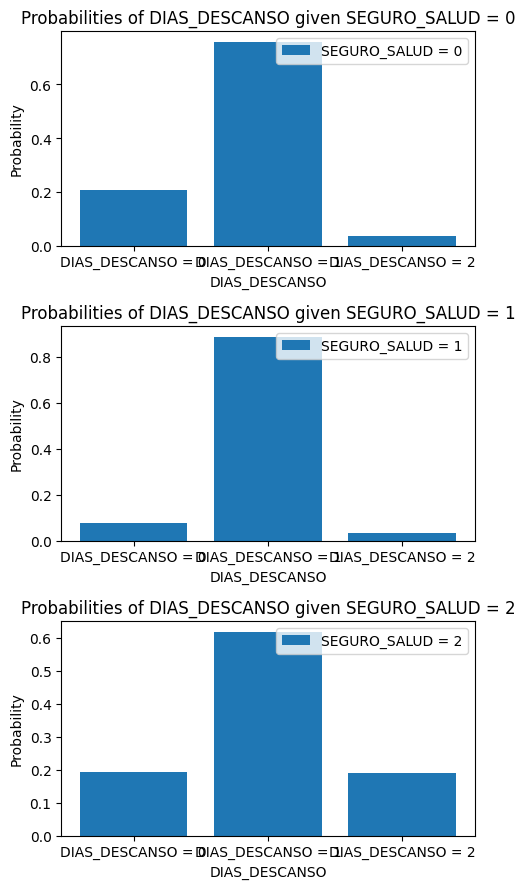

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

possible_values_of_seguro = [0, 1, 2]

results = {}

# Loop through each possible value of 'SEGURO_SALUD'
for seguro_value in possible_values_of_seguro:
    query = infer.query(variables=['DIAS_DESCANSO'], evidence={'SEGURO_SALUD': seguro_value})

    # Store the result
    results[seguro_value] = query.values

# Number of subplots
num_subplots = len(possible_values_of_seguro)

# Creating subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(5, 3 * num_subplots))

# Plotting each subplot
for i, seguro_value in enumerate(possible_values_of_seguro):
    ax = axes[i] if num_subplots > 1 else axes
    probs = results[seguro_value]

    ax.bar([f'DIAS_DESCANSO = {j}' for j in range(len(probs))], probs, label=f'SEGURO_SALUD = {seguro_value}')
    ax.set_xlabel('DIAS_DESCANSO')
    ax.set_ylabel('Probability')
    ax.set_title(f'Probabilities of DIAS_DESCANSO given SEGURO_SALUD = {seguro_value}')
    ax.legend()

plt.tight_layout()
plt.show()
